In [13]:
import numpy as np
import pandas as pd
import wrds
import datetime as dt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [26]:
df = pd.read_csv("/Users/dhruvishah/Desktop/Quant_Fin/SEM 2/Dissertation/final_data/outsamp_cnn.csv")
# df.returns = df.returns/3
# df.label = df.label.str.lower()
# df.loc[df.label=="negative",'r_score'] = df.score
# df.loc[df.label=="positive",'r_score'] = 1-df.score
# df = df[df.sentiment!='neutral']
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.score = round(df.score,6)

In [27]:
df.loc[df.predictions==1, 'label'] = 'positive'
df.loc[df.predictions==0, 'label'] = 'negative'

In [28]:
df_pos = df.copy()
df_pos.loc[df_pos.label=="positive",'c_score'] =  df_pos.score
df_pos.loc[df_pos.label=="negative",'c_score'] = 1-df_pos.score
df_neg = df.copy()
df_neg.loc[df_neg.label=="positive",'c_score'] = 1-df_neg.score
df_neg.loc[df_neg.label=="negative",'c_score'] = df_neg.score

In [29]:
ticks = df.compname.unique().tolist()
weeks = df.week.unique().tolist()

In [30]:
mktcap = pd.read_csv("/Users/dhruvishah/Desktop/Quant_Fin/SEM 2/Dissertation/mktcap2016.csv")
mktcap.sort_values(by="Market Capitalization", inplace=True, ascending=False)
mktcap = mktcap.loc[mktcap['Ticker Name'].isin(ticks)]
mktcap.reset_index(drop=True, inplace=True)

In [31]:
cap = mktcap['Market Capitalization'].sum()
for i in range(len(mktcap["Ticker Name"])):
#     temp = df[df.compname==i]
#     temp.loc['']
#     df.loc[df.compname==mktcap["Ticker Name"][i], 'vw'] = mktcap['Market Capitalisation'][i]/cap
    df_pos.loc[df_pos.compname==mktcap["Ticker Name"][i], 'mkt_cap'] = mktcap['Market Capitalization'][i]
    df_neg.loc[df_neg.compname==mktcap["Ticker Name"][i], 'mkt_cap'] = mktcap['Market Capitalization'][i]

In [32]:
len(df_neg.week[df.label=='negative'].unique())

363

In [36]:
df_pos.c_score = round(df_pos.c_score,5)

In [37]:
df_pos['Rank'] = df_pos.groupby(['week'])['c_score'].rank(method='first',ascending =False)
df_neg['Rank'] = df_neg.groupby(['week'])['c_score'].rank(method='first')

In [38]:
df_pos

,week,FROM,TO,headline,clean_headline,returns,tf-idf,sentiment,sent_score,compname,predictions,score,label,c_score,mkt_cap,Rank
0,1,04/01/16,22/01/16,kinem enter strateg proteom biomark discoveri ...,kinem enter strateg proteom biomark discoveri ...,-4.863740,3.253156,positive,1,PFE,1,0.994062,positive,0.99406,1.972434e+08,9.0
1,1,04/01/16,22/01/16,sach associ ltd annual cancer biopartn invest ...,sach associ ltd annual cancer biopartn invest ...,-6.381729,-0.742992,negative,0,BMY,0,0.001211,negative,0.99879,1.118252e+08,6.0
2,1,04/01/16,22/01/16,sach associ ltd annual european life scienc ce...,sach associ ltd annual european life scienc ce...,-0.792988,0.372423,positive,1,GSK,0,0.001868,negative,0.99813,1.601124e+07,7.0
3,1,04/01/16,22/01/16,present goldman sach healthcar ceo unscript vi...,present goldman sach healthcar ceo unscript vi...,-2.783046,1.264571,positive,1,MRK,1,0.999414,positive,0.99941,1.466051e+08,5.0
4,1,04/01/16,22/01/16,scientif corpor earn call feb.scientif corpor ...,scientif corpor earn call feb scientif corpor ...,-3.199669,-3.176648,negative,0,BSX,0,0.000000,negative,1.00000,2.420006e+07,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4785,363,12/12/22,30/12/22,cardin announc execut chang effect februari.,cardin announc execut chang effect februari,-0.237557,0.988233,positive,1,CAH,1,1.000000,positive,1.00000,2.893388e+07,1.0
4786,363,12/12/22,30/12/22,cv corpor earn call feb.hmg strategi llc centr...,cv corpor earn call feb hmg strategi llc centr...,-8.322794,3.403083,positive,1,CVS,1,0.999901,positive,0.99990,1.068118e+08,4.0
4787,363,12/12/22,30/12/22,gsk plc announc new global headquart central l...,gsk plc announc new global headquart central l...,-2.307340,2.055391,positive,1,GSK,1,0.810174,positive,0.81017,1.601124e+07,13.0
4788,363,12/12/22,30/12/22,bristol myer squibb announc first disclosur ne...,bristol myer squibb announc first disclosur ne...,-8.727612,1.042762,positive,1,BMY,1,0.998485,positive,0.99848,1.118252e+08,5.0


In [39]:
def get_portfolio_long_ew(frame):
    ret = [0]
    cum_ret = 1
    for i in weeks[1:]:
        temp = frame[frame.week == i]
        stock = max(temp.Rank) - 4
        mid_df = temp[temp.Rank >= stock]
        weights = 1/len(temp)
        returns = sum(mid_df.returns*weights)
        cum_ret = returns
        ret.append(cum_ret) 
    return ret 

# fig = plt.figure()
# ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
# ax1.plot(get_portfolio_long_ew(df))
# ax1.set_xlabel('Date')
# ax1.set_ylabel("Cumulative Returns")
# ax1.set_title("Long Portfolio Cumulative Returns")
# plt.show()

In [40]:
def get_portfolio_short_ew(frame):
    ret = [0]
    cum_ret = 0
    for i in weeks[1:]:
        temp = frame[frame.week == i]
#         stock = min(temp.Rank) - 4
        mid_df = temp[temp.Rank <= 5]
        weights = 1/len(temp)
        returns = sum(mid_df.returns*weights)
        cum_ret = returns
        ret.append(cum_ret) 
    return ret 

In [41]:
def get_portfolio_long_vw(frame):
    ret = [0]
    cum_ret = 1
    for i in weeks[1:]:
        temp = frame[frame.week == i]
        stock = max(temp.Rank) - 4
        mid_df = temp[temp.Rank >= stock]
#         print(mid_df)
        cap_sum = sum(mid_df.mkt_cap)
        weights = mid_df.mkt_cap/cap_sum
        returns = sum(mid_df.returns*weights)
#         returns = sum(mid_df.returns*mid_df.vw)
        cum_ret = returns
        ret.append(cum_ret) 
    return ret 
# get_portfolio_long_vw(df_pos)

In [42]:
def get_portfolio_short_vw(frame):
    ret = [0]
    cum_ret = 1
    for i in weeks[1:]:
        temp = frame[frame.week == i]
#         stock = min(temp.Rank) - 4
        mid_df = temp[temp.Rank <= 5]
#         print(mid_df)
        cap_sum = sum(mid_df.mkt_cap)
        weights = mid_df.mkt_cap/cap_sum
        returns = sum(mid_df.returns*weights)
#         returns = sum(mid_df.returns*mid_df.vw)
        cum_ret = returns
        ret.append(cum_ret)
    return ret
# get_portfolio_long_vw(df)

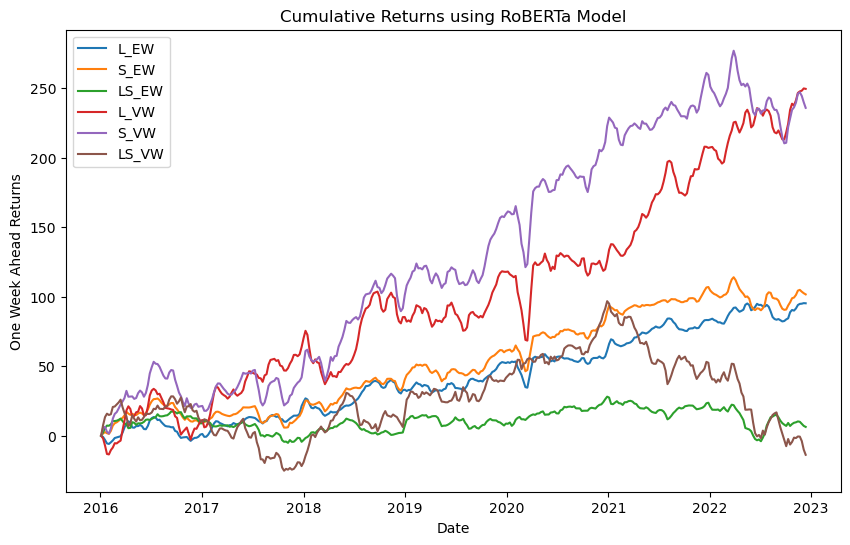

In [45]:
df['FROM'] = pd.to_datetime(df['FROM'], format='%d/%m/%y')
l_ew = pd.Series(get_portfolio_long_ew(df_pos))
s_ew = pd.Series(get_portfolio_short_ew(df_neg))
ls_ew = s_ew-l_ew
l_vw = pd.Series(get_portfolio_long_vw(df_pos))
s_vw = pd.Series(get_portfolio_short_vw(df_neg))
ls_vw = s_vw-l_vw 
yrs = pd.DatetimeIndex(df['FROM']).unique().tolist()
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the lines
# Plot the lines
plt.plot(yrs, np.cumsum(l_ew), label='L_EW')
plt.plot(yrs, np.cumsum(s_ew), label='S_EW')
plt.plot(yrs, np.cumsum(ls_ew), label='LS_EW')
plt.plot(yrs, np.cumsum(l_vw), label='L_VW')
plt.plot(yrs, np.cumsum(s_vw), label='S_VW')
plt.plot(yrs, np.cumsum(ls_vw), label='LS_VW')
plt.xlabel('Date')  # Replace with your actual x-axis label
plt.ylabel('One Week Ahead Returns')
plt.title('Cumulative Returns using RoBERTa Model')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [46]:
print("Accuracy score for finbert model = ", accuracy_score(df.sentiment,df.label.fillna('')))

Accuracy score for finbert model =  0.8162839248434238


In [47]:
port_vals = pd.DataFrame(columns=['avg', 'stdev', 'std_downside', 'sharpe_ratio', 'sortino_ratio','ff3_alpha', 'ff3_r2', 'ff5_alpha', 'ff5_r2'])

In [48]:
avg = [np.mean(l_ew)] + [np.mean(s_ew)] + [np.mean(ls_ew)] + [np.mean(l_vw)] + [np.mean(s_vw)] + [np.mean(ls_vw)] 
stdev = [np.std(l_ew)] + [np.std(s_ew)] + [np.std(ls_ew)] + [np.std(l_vw)] + [np.std(s_vw)] + [np.std(ls_vw)]

In [49]:
downside = [np.std(l_ew[l_ew < 0]), np.std(s_ew[s_ew < 0]), np.std(ls_ew[ls_ew < 0]),np.std(l_vw[l_vw < 0]),
            np.std(s_vw[s_vw < 0]), np.std(ls_vw[ls_vw < 0])]

In [50]:
port_vals['avg'] = avg
port_vals['stdev'] = stdev
port_vals['std_downside'] = downside

In [51]:
new_index = ['l_ew', 's_ew', 'ls_ew', 'l_vw', 's_vw', 'ls_vw']
port_vals = port_vals.set_index(pd.Index(new_index))

In [52]:
for i in range(len(port_vals)):
    port_vals.sharpe_ratio[i]=(port_vals.avg[i]-0.00224)/port_vals.stdev[i]
    port_vals.sortino_ratio[i]=(port_vals.avg[i]-0.00224)/port_vals.std_downside[i]
port_vals

/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_42249/2928192363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_vals.sharpe_ratio[i]=(port_vals.avg[i]-0.00224)/port_vals.stdev[i]
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_42249/2928192363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_vals.sortino_ratio[i]=(port_vals.avg[i]-0.00224)/port_vals.std_downside[i]


,avg,stdev,std_downside,sharpe_ratio,sortino_ratio,ff3_alpha,ff3_r2,ff5_alpha,ff5_r2
l_ew,0.262489,1.652585,0.997938,0.15748,0.260787,NaN,NaN,NaN,NaN
s_ew,0.280117,1.869974,1.119476,0.148599,0.248221,NaN,NaN,NaN,NaN
ls_ew,0.017628,1.414941,0.978144,0.010875,0.015732,NaN,NaN,NaN,NaN
l_vw,0.687181,4.105333,2.536791,0.166842,0.270003,NaN,NaN,NaN,NaN
s_vw,0.649587,4.340343,2.628539,0.149146,0.246276,NaN,NaN,NaN,NaN
ls_vw,-0.037594,3.314036,2.293120,-0.01202,-0.017371,NaN,NaN,NaN,NaN


In [53]:
ff3 = pd.read_csv("ff3.csv")
ff3.date = pd.to_datetime(ff3['date'], format='%d/%m/%y')
ff3.set_index('date', inplace=True)

start = []
weekly_first_days = ff3.resample('W-MON').first()

weekly_first_days = weekly_first_days.dropna()

start = weekly_first_days.index.strftime('%d/%m/%y').tolist()
start_list = start[:-1]

end = []
weekly_last_days = ff3.resample('W-FRI').last()

weekly_last_days = weekly_last_days.dropna()

end_list = weekly_last_days.index.strftime('%d/%m/%y').tolist()
weekly_df = pd.DataFrame(columns=[['FROM'] +['TO']])
start_list = pd.to_datetime(start_list, format='%d/%m/%y')
end_list = pd.to_datetime(end_list, format='%d/%m/%y')
start_list = start_list.sort_values()
end_list = end_list.sort_values()

In [54]:
cols = ff3.columns.tolist()

weekly_df = pd.DataFrame(columns= cols)
for i in range(len(start_list)):
    start_date = start_list[i]
    end_date = end_list[i]
    selected_data = ff3[(ff3.index >= start_date) & (ff3.index <= end_date)]
    data = selected_data.sum()
    data = pd.DataFrame(data).T
    weekly_df = pd.concat([weekly_df, data])
weekly_df['date'] = start_list
weekly_df

,mktrf,smb,hml,rf,umd,date
0,-0.0637,-0.0198,0.0058,0.00000,0.0141,2016-01-04
0,-0.0250,-0.0137,-0.0020,0.00000,0.0253,2016-01-11
0,0.0140,0.0023,-0.0155,0.00000,-0.0126,2016-01-18
0,0.0176,-0.0052,0.0359,0.00000,-0.0160,2016-01-25
0,-0.0337,-0.0150,0.0109,0.00005,-0.0357,2016-02-01
...,...,...,...,...,...,...
0,0.0129,0.0124,-0.0250,0.00074,-0.0209,2022-11-28
0,-0.0380,-0.0131,-0.0055,0.00080,0.0093,2022-12-05
0,-0.0208,0.0004,0.0021,0.00080,0.0101,2022-12-12
0,-0.0037,-0.0093,0.0286,0.00080,0.0458,2022-12-19


In [55]:
weekly = weekly_df.loc[weekly_df['date'].isin(df.FROM.unique())]
weekly.reset_index(drop=True, inplace=True)

weekly['l_ew'] = l_ew
weekly['s_ew'] = s_ew
weekly['ls_ew'] = ls_ew
weekly['l_vw'] = l_vw
weekly['s_vw'] = s_vw
weekly['ls_vw'] = ls_vw

weekly

/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_42249/1357161703.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly['l_ew'] = l_ew
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_42249/1357161703.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly['s_ew'] = s_ew
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_42249/1357161703.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,mktrf,smb,hml,rf,umd,date,l_ew,s_ew,ls_ew,l_vw,s_vw,ls_vw
0,-0.0637,-0.0198,0.0058,0.00000,0.0141,2016-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.0250,-0.0137,-0.0020,0.00000,0.0253,2016-01-11,-0.837633,1.718833,2.556467,-1.873468,5.762025,7.635493
2,0.0140,0.0023,-0.0155,0.00000,-0.0126,2016-01-18,-2.162855,0.938152,3.101007,-5.155650,0.666892,5.822542
3,0.0176,-0.0052,0.0359,0.00000,-0.0160,2016-01-25,-2.465722,-0.778279,1.687443,-6.026828,-3.577781,2.449047
4,-0.0337,-0.0150,0.0109,0.00005,-0.0357,2016-02-01,-0.382184,-0.480719,-0.098534,-0.330135,-1.256593,-0.926458
...,...,...,...,...,...,...,...,...,...,...,...,...
358,-0.0097,-0.0157,0.0078,0.00070,0.0580,2022-11-14,2.480573,3.119927,0.639354,5.368955,6.515442,1.146487
359,0.0143,-0.0063,0.0093,0.00056,0.0037,2022-11-21,0.815221,0.535471,-0.279750,1.088402,0.979670,-0.108733
360,0.0129,0.0124,-0.0250,0.00074,-0.0209,2022-11-28,0.147628,-1.310381,-1.458009,0.527033,-2.658299,-3.185332
361,-0.0380,-0.0131,-0.0055,0.00080,0.0093,2022-12-05,0.387704,-1.091020,-1.478725,1.611056,-4.549336,-6.160392


In [56]:
import statsmodels.api as sm

ports = ['l_ew', 's_ew', 'ls_ew', 'l_vw', 's_vw', 'ls_vw']

for i in range(len(ports)):
    X = weekly[['mktrf', 'smb', 'hml']]  # Independent variables
    X = sm.add_constant(X)  # Add a constant term
    y = weekly[ports[i]]  # Dependent variable
    model = sm.OLS(y, X).fit()
    port_vals.ff3_alpha[i] = model.params['const']
    port_vals.ff3_r2[i] = model.rsquared*100
port_vals

/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_42249/1889115454.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_vals.ff3_alpha[i] = model.params['const']
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_42249/1889115454.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_vals.ff3_r2[i] = model.rsquared*100
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_42249/1889115454.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

,avg,stdev,std_downside,sharpe_ratio,sortino_ratio,ff3_alpha,ff3_r2,ff5_alpha,ff5_r2
l_ew,0.262489,1.652585,0.997938,0.15748,0.260787,0.215599,10.54266,NaN,NaN
s_ew,0.280117,1.869974,1.119476,0.148599,0.248221,0.213859,17.679766,NaN,NaN
ls_ew,0.017628,1.414941,0.978144,0.010875,0.015732,-0.00174,3.667178,NaN,NaN
l_vw,0.687181,4.105333,2.536791,0.166842,0.270003,0.568725,10.568018,NaN,NaN
s_vw,0.649587,4.340343,2.628539,0.149146,0.246276,0.50081,15.707219,NaN,NaN
ls_vw,-0.037594,3.314036,2.293120,-0.01202,-0.017371,-0.067914,1.902131,NaN,NaN


In [57]:
ff5 = pd.read_csv("ff5.csv")
ff5.date = pd.to_datetime(ff5['date'], format='%d/%m/%y')
ff5.set_index('date', inplace=True)
# cols = ff3.columns.tolist()
weekly_df_ff5 = pd.DataFrame(columns= cols)
for i in range(len(start_list)):
    start_date = start_list[i]
    end_date = end_list[i]
    selected_data = ff5[(ff5.index >= start_date) & (ff5.index <= end_date)]
    data = selected_data.sum()
    data = pd.DataFrame(data).T
    weekly_df_ff5 = pd.concat([weekly_df_ff5, data])
weekly_df_ff5['date'] = start_list
weekly_ff5 = weekly_df_ff5.loc[weekly_df_ff5['date'].isin(df.FROM.unique())]
weekly_ff5.reset_index(drop=True, inplace=True)

weekly_ff5['l_ew'] = l_ew
weekly_ff5['s_ew'] = s_ew
weekly_ff5['ls_ew'] = ls_ew
weekly_ff5['l_vw'] = l_vw
weekly_ff5['s_vw'] = s_vw
weekly_ff5['ls_vw'] = ls_vw
weekly_ff5

/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_42249/3423993167.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_ff5['l_ew'] = l_ew
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_42249/3423993167.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_ff5['s_ew'] = s_ew
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_42249/3423993167.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,mktrf,smb,hml,rf,umd,rmw,cma,date,l_ew,s_ew,ls_ew,l_vw,s_vw,ls_vw
0,-0.0637,-0.0204,0.0058,0.00000,0.0141,0.0129,0.0117,2016-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.0250,-0.0136,-0.0020,0.00000,0.0253,0.0075,0.0063,2016-01-11,-0.837633,1.718833,2.556467,-1.873468,5.762025,7.635493
2,0.0140,-0.0001,-0.0155,0.00000,-0.0126,0.0040,-0.0029,2016-01-18,-2.162855,0.938152,3.101007,-5.155650,0.666892,5.822542
3,0.0176,-0.0029,0.0359,0.00000,-0.0160,0.0055,0.0149,2016-01-25,-2.465722,-0.778279,1.687443,-6.026828,-3.577781,2.449047
4,-0.0337,-0.0115,0.0109,0.00005,-0.0357,0.0206,0.0153,2016-02-01,-0.382184,-0.480719,-0.098534,-0.330135,-1.256593,-0.926458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,-0.0097,-0.0123,0.0078,0.00070,0.0580,0.0294,0.0219,2022-11-14,2.480573,3.119927,0.639354,5.368955,6.515442,1.146487
359,0.0143,-0.0056,0.0093,0.00056,0.0037,0.0027,0.0042,2022-11-21,0.815221,0.535471,-0.279750,1.088402,0.979670,-0.108733
360,0.0129,0.0060,-0.0250,0.00074,-0.0209,-0.0099,-0.0061,2022-11-28,0.147628,-1.310381,-1.458009,0.527033,-2.658299,-3.185332
361,-0.0380,-0.0135,-0.0055,0.00080,0.0093,0.0142,0.0097,2022-12-05,0.387704,-1.091020,-1.478725,1.611056,-4.549336,-6.160392


In [58]:
import statsmodels.api as sm

ports = ['l_ew', 's_ew', 'ls_ew', 'l_vw', 's_vw', 'ls_vw']

for i in range(len(ports)):
    X = weekly_ff5[['mktrf', 'smb', 'hml']]  # Independent variables
    X = sm.add_constant(X)  # Add a constant term
    y = weekly_ff5[ports[i]]  # Dependent variable
    model = sm.OLS(y, X).fit()
    port_vals.ff5_alpha[i] = model.params['const']
    port_vals.ff5_r2[i] = model.rsquared*100
port_vals

/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_42249/2632019457.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_vals.ff5_alpha[i] = model.params['const']
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_42249/2632019457.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_vals.ff5_r2[i] = model.rsquared*100
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_42249/2632019457.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

,avg,stdev,std_downside,sharpe_ratio,sortino_ratio,ff3_alpha,ff3_r2,ff5_alpha,ff5_r2
l_ew,0.262489,1.652585,0.997938,0.15748,0.260787,0.215599,10.54266,0.216126,10.543572
s_ew,0.280117,1.869974,1.119476,0.148599,0.248221,0.213859,17.679766,0.214624,17.751407
ls_ew,0.017628,1.414941,0.978144,0.010875,0.015732,-0.00174,3.667178,-0.001503,3.677179
l_vw,0.687181,4.105333,2.536791,0.166842,0.270003,0.568725,10.568018,0.569517,10.518213
s_vw,0.649587,4.340343,2.628539,0.149146,0.246276,0.50081,15.707219,0.502127,15.680395
ls_vw,-0.037594,3.314036,2.293120,-0.01202,-0.017371,-0.067914,1.902131,-0.06739,1.914882


In [68]:
port_vals.to_csv("cnn_port_vals.csv")

In [60]:
from sklearn.metrics import precision_score

print("Precision score for outsample data roberta model = ", precision_score(df.sentiment,df.label, average='weighted'))

Precision score for outsample data roberta model =  0.8181317381836375


In [61]:
from sklearn.metrics import recall_score

In [62]:
print("Precision score for outsample data finbert model = ", recall_score(df.sentiment,df.label, average='weighted'))

Precision score for outsample data finbert model =  0.8162839248434238


In [63]:
from sklearn.metrics import f1_score

print("Precision score for outsample data finbert model = ", f1_score(df.sentiment,df.label, average='weighted'))

Precision score for outsample data finbert model =  0.8165107695126552


In [64]:
print('l',np.cumsum(l_ew)[-1:],'\n')
print('s',np.cumsum(s_ew)[-1:],'\n')
print('ls',np.cumsum(ls_ew)[-1:],'\n')
print('l vw',np.cumsum(l_vw)[-1:],'\n')
print('s vw',np.cumsum(s_vw)[-1:],'\n')
print('ls vw',np.cumsum(ls_vw)[-1:],'\n')

l 362    95.283521
dtype: float64 

s 362    101.682491
dtype: float64 

ls 362    6.398969
dtype: float64 

l vw 362    249.446584
dtype: float64 

s vw 362    235.799943
dtype: float64 

ls vw 362   -13.646641
dtype: float64 



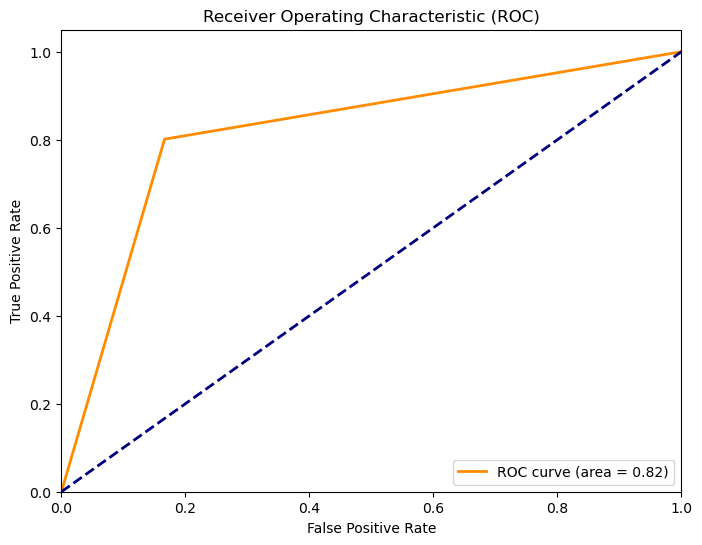

In [67]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities from the model
# y_pred_probs = model.predict(df.sentiment)

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(df.sent_score, df.predictions)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()